In [2]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
uploaded = files.upload()

Saving stroke.csv.csv to stroke.csv.csv


In [6]:
import pandas as pd
df=pd.read_csv("stroke.csv.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
x=df.iloc[:,3].values
y=df.iloc[:,11].values

In [9]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x.reshape(-1,1),y)

In [10]:
x.shape

(9722, 1)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
#Decision tree
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
pred=classifier.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5845758354755785

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[879,  94],
       [714, 258]])

In [16]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.55      0.90      0.69       973
           1       0.73      0.27      0.39       972

    accuracy                           0.58      1945
   macro avg       0.64      0.58      0.54      1945
weighted avg       0.64      0.58      0.54      1945



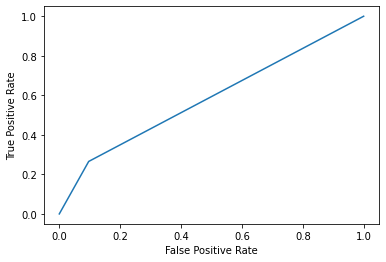

In [17]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

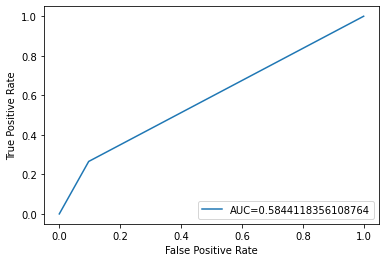

In [18]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

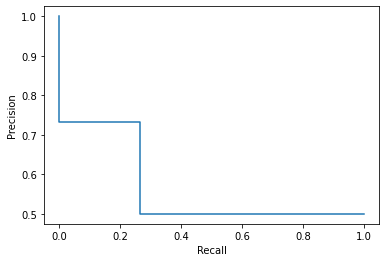

In [19]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [20]:
#knn
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [21]:
pred=classifier.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5002570694087404

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[973,   0],
       [972,   0]])

In [24]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       973
           1       0.00      0.00      0.00       972

    accuracy                           0.50      1945
   macro avg       0.25      0.50      0.33      1945
weighted avg       0.25      0.50      0.33      1945



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


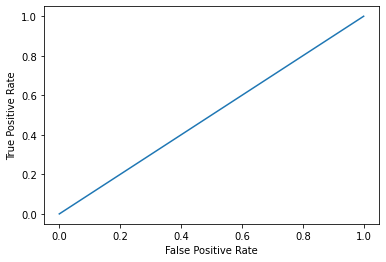

In [25]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

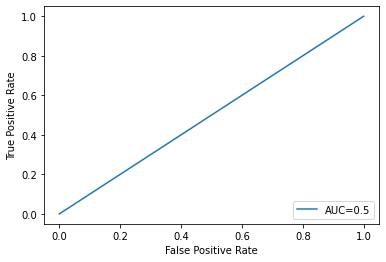

In [26]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

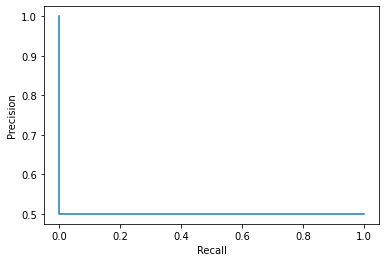

In [27]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [28]:
#svm
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [29]:
pred=classifier.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5845758354755785

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[879,  94],
       [714, 258]])

In [32]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.55      0.90      0.69       973
           1       0.73      0.27      0.39       972

    accuracy                           0.58      1945
   macro avg       0.64      0.58      0.54      1945
weighted avg       0.64      0.58      0.54      1945



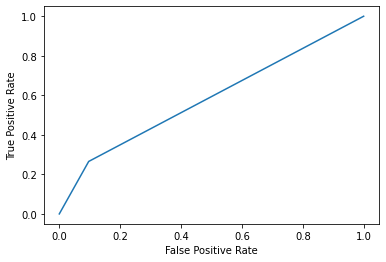

In [33]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

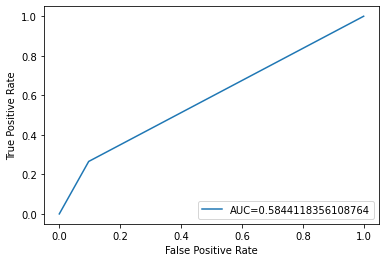

In [34]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

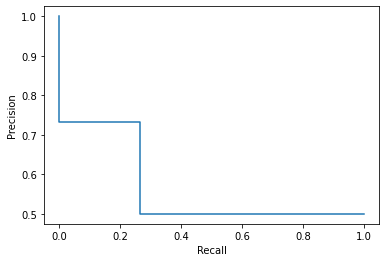

In [35]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [36]:
#random forest
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [37]:
pred=classifier.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5845758354755785

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[879,  94],
       [714, 258]])

In [40]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.55      0.90      0.69       973
           1       0.73      0.27      0.39       972

    accuracy                           0.58      1945
   macro avg       0.64      0.58      0.54      1945
weighted avg       0.64      0.58      0.54      1945



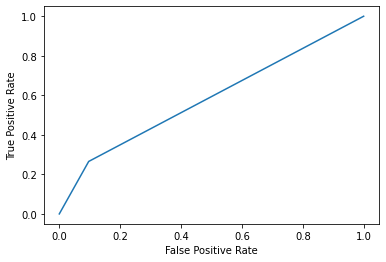

In [41]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

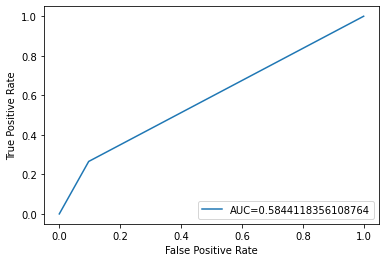

In [42]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

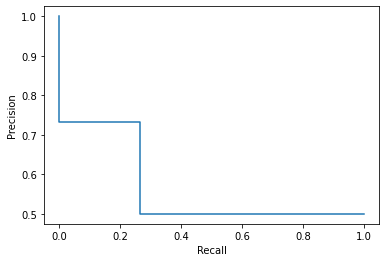

In [43]:

precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [44]:
#logistic regression
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression()  
classifier.fit(x_train, y_train)  

LogisticRegression()

In [45]:
pred=classifier.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5845758354755785

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[879,  94],
       [714, 258]])

In [48]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.55      0.90      0.69       973
           1       0.73      0.27      0.39       972

    accuracy                           0.58      1945
   macro avg       0.64      0.58      0.54      1945
weighted avg       0.64      0.58      0.54      1945



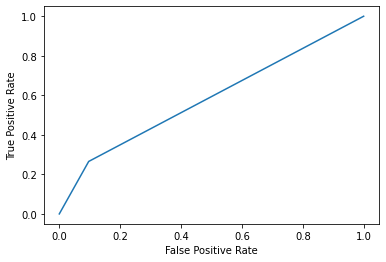

In [49]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

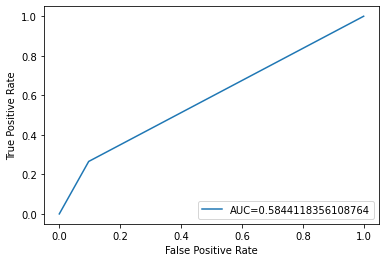

In [50]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

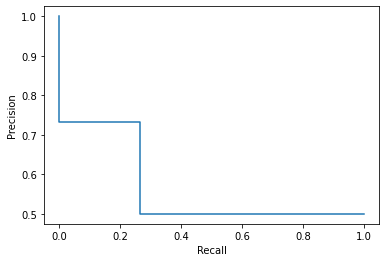

In [51]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [52]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [53]:
pred=classifier.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5845758354755785

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[879,  94],
       [714, 258]])

In [56]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.55      0.90      0.69       973
           1       0.73      0.27      0.39       972

    accuracy                           0.58      1945
   macro avg       0.64      0.58      0.54      1945
weighted avg       0.64      0.58      0.54      1945



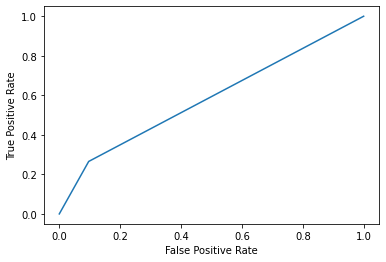

In [57]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

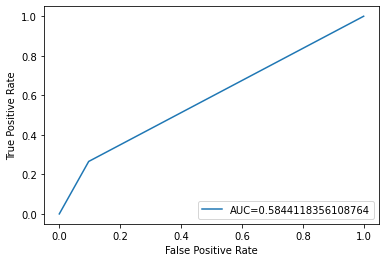

In [58]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

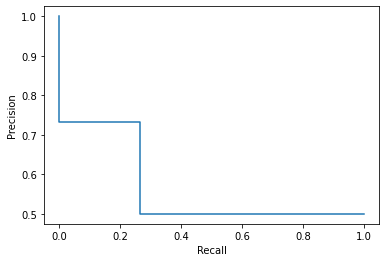

In [59]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [60]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [61]:
#fuzzy
from fcmeans import FCM
classifier = FCM(n_clusters=2)
classifier.fit(x)

/usr/local/lib/python3.8/dist-packages/fcmeans/main.py:61: RuntimeWarning: divide by zero encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_
/usr/local/lib/python3.8/dist-packages/fcmeans/main.py:61: RuntimeWarning: invalid value encountered in true_divide
  denominator_ = temp[:, :, np.newaxis] / denominator_


In [62]:
pred=classifier.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.5002570694087404

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[973,   0],
       [972,   0]])

In [65]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       973
           1       0.00      0.00      0.00       972

    accuracy                           0.50      1945
   macro avg       0.25      0.50      0.33      1945
weighted avg       0.25      0.50      0.33      1945



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


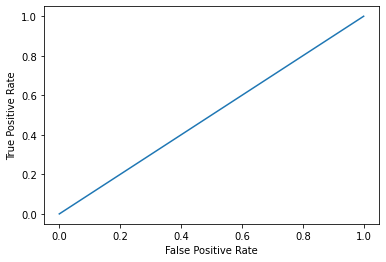

In [66]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

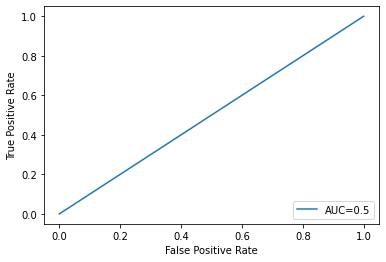

In [67]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

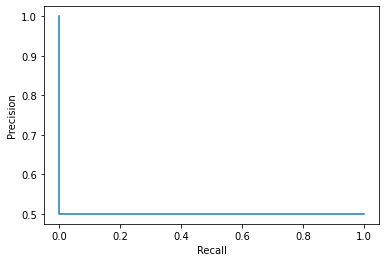

In [68]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [74]:
def new_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['dt'] = tree.DecisionTreeClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  models['rf']=RandomForestClassifier()
  models['stacking'] = new_stacking()
  return models

In [75]:
from sklearn.ensemble import StackingClassifier
def new_stacking():
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('dt', tree.DecisionTreeClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  level0.append(('rf',RandomForestClassifier() ))
  level1 = LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=6)
  return model

In [76]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
def eval_model(model):
  cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=4, random_state=2)
  scr = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-2, error_score='raise')
  return scr

>lr 0.5863 (0.0161)
>knn 0.5000 (0.0003)
>dt 0.5863 (0.0161)
>svm 0.5863 (0.0161)
>bayes 0.5863 (0.0161)
>rf 0.5863 (0.0161)
>stacking 0.5863 (0.0161)


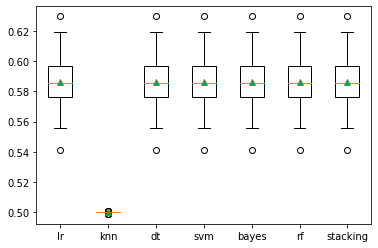

In [77]:
from numpy import mean
from numpy import std
X=x
Y=y
models = new_models()
results, names = list(), list()
for name, model in models.items():
  scr = eval_model(model)
  results.append(scr)
  names.append(name)
  print('>%s %.4f (%.4f)' % (name, mean(scr), std(scr)))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [78]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [79]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [80]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [81]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [82]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [83]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
244/244 [==============================] - 2s 4ms/step - loss: 0.6935 - accuracy: 0.4806
Epoch 2/50
244/244 [==============================] - 1s 4ms/step - loss: 0.6879 - accuracy: 0.5867
Epoch 3/50
244/244 [==============================] - 1s 4ms/step - loss: 0.6850 - accuracy: 0.5867
Epoch 4/50
244/244 [==============================] - 1s 2ms/step - loss: 0.6825 - accuracy: 0.5867
Epoch 5/50
244/244 [==============================] - 1s 2ms/step - loss: 0.6803 - accuracy: 0.5867
Epoch 6/50
244/244 [==============================] - 1s 2ms/step - loss: 0.6783 - accuracy: 0.5867
Epoch 7/50
244/244 [==============================] - 1s 3ms/step - loss: 0.6767 - accuracy: 0.5867
Epoch 8/50
244/244 [==============================] - 1s 2ms/step - loss: 0.6752 - accuracy: 0.5867
Epoch 9/50
244/244 [==============================] - 1s 2ms/step - loss: 0.6738 - accuracy: 0.5867
Epoch 10/50
244/244 [==============================] - 1s 2ms/step - loss: 0.6728 - accuracy: 0.5867

In [84]:
y_pred = ann.predict(x_test)

61/61 [==============================] - 0s 1ms/step


In [85]:
y_pred = (y_pred > 0.5)

In [86]:
import numpy as np
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)


array([[879,  94],
       [714, 258]])

In [88]:
accuracy_score(y_test, y_pred)

0.5845758354755785

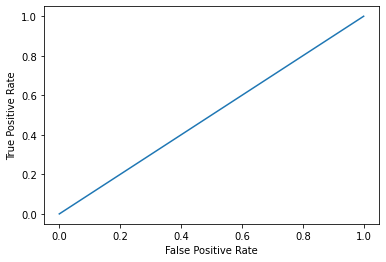

In [89]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

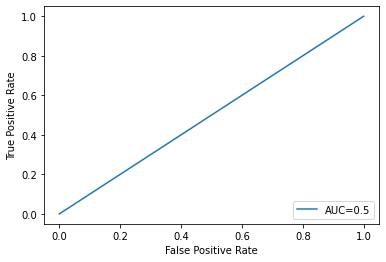

In [90]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

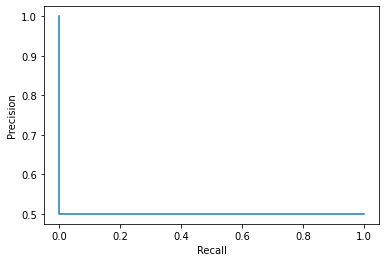

In [91]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()